# This kernel will be going through my work on finding meaningful insights and creating estimators of the probability of guest(s) cancelling their hotel booking.


## Data Analysis
Firstly, I will import the relevant libraries first.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler 

# # set some display options:
sb.set(style = 'darkgrid')
pd.set_option('display.max_columns', 36)

import warnings
warnings.filterwarnings('ignore')

Before we dive into any feature engineering and selection, I decided to do an simple analysis from the raw data first.

We shall first find the shape, types of columns and a description of the data in each column.

### Shape of hotel dataset

In [2]:
hotel_data = pd.read_csv('C:/Users/Alloy/Desktop/Ploject/Data/hotel-booking-demand/hotel_bookings.csv')
hotel_data.shape

(119390, 32)

### Columns in hotel dataset

In [3]:
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Describing the hotel dataset for better better understanding

In [4]:
hotel_data.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

Next, let's analyse certain aspects of the data in greater detail first.

First, we shall see where the hotel's guests are from. As the guests' countries varies by a lot, we will be using the value_counts function instead of a pie chart for better evaluation.

### Which country did the guests came from?

In [5]:
hotel_data['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
CHN      999
POL      919
ISR      669
RUS      632
NOR      607
ROU      500
FIN      447
DNK      435
AUS      426
AGO      362
LUX      287
MAR      259
TUR      248
HUN      230
ARG      214
       ...  
HND        1
UMI        1
MMR        1
NPL        1
MDG        1
PLW        1
FJI        1
MRT        1
DMA        1
SDN        1
ASM        1
KIR        1
PYF        1
BHS        1
SMR        1
DJI        1
GUY        1
ATF        1
AIA        1
SLE        1
CYM        1
NCL        1
LCA        1
NAM        1
BFA        1
BDI        1
BWA        1
VGB        1
MLI        1
NIC        1
Name: country, Length: 177, dtype: int64

### Finding the fluctuation of room price throughout the entire year

In [6]:
# Extracting the data of guests who stayed at the hotel (some data included people who did not stay or cancelled)
# Then, sorting the extracted data by months

guests = hotel_data.loc[hotel_data['is_canceled'] == 0]
prices = guests[['hotel', 'arrival_date_month', 'adr']].sort_values('arrival_date_month')
adr = guests['adr']

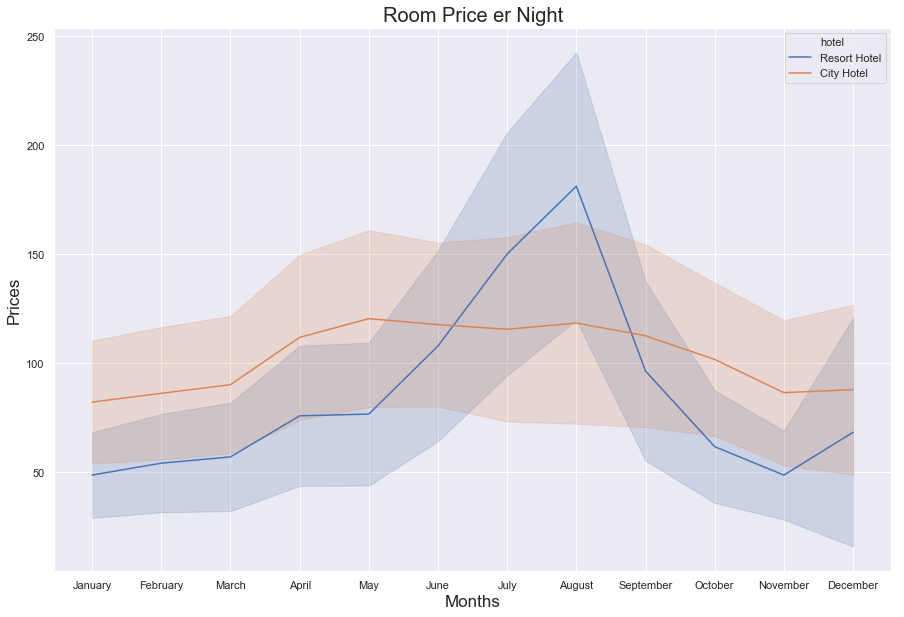

In [7]:
# Setting the order of months to be shown in the plot or else it will start from April instead

to_set_months_inorder = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']
prices['arrival_date_month'] = pd.Categorical(prices['arrival_date_month'], categories = to_set_months_inorder)

# Setting up the plot

plt.figure(figsize = (15, 10))
sb.lineplot(x = 'arrival_date_month', y = adr, hue = 'hotel', data = prices, ci = 'sd')
plt.title('Room Price er Night', fontsize = 20)
plt.xlabel('Months', fontsize = 17)
plt.ylabel('Prices', fontsize = 17)
plt.show()

Several assumptions were made for the plot above as I only wanted to do a general plot first. The price shown above did not factor in the number of people staying in the room, hence, it is based on price per room and not price per person. Other factors that were not included were the meals and room types which could affect the pricing of the room as well.

From the general graph above, it can be seent that city hotel room prices are generally more expensive throughout the year with resort hotel costing more during the months of June to August.

# TBC
### Finding out how long did the guests stay from a graph

In [8]:
# First, I will splilt the data into the 2 hotels the guests came from

resort_hotel = hotel_data.loc[(hotel_data['hotel'] == 'Resort Hotel')]
city_hotel = hotel_data.loc[(hotel_data['hotel'] == 'City Hotel')]

In [9]:
# Consolidating the number of nights each guest(s) stayed

resort_hotel['total_nights'] = resort_hotel['stays_in_weekend_nights'] + resort_hotel['stays_in_week_nights']
city_hotel['total_nights'] = city_hotel['stays_in_weekend_nights'] + city_hotel['stays_in_week_nights']

# Further separating the number of nights, number of bookings 

num_nights_res = list(resort_hotel['total_nights'].value_counts().index)
num_bookings_res = list(resort_hotel['total_nights'].value_counts())
rel_bookings_res = resort_hotel['total_nights'].value_counts() / sum(num_bookings_res) * 100 # convert to percent

num_nights_cty = list(city_hotel['total_nights'].value_counts().index)
num_bookings_cty = list(city_hotel['total_nights'].value_counts())
rel_bookings_cty = city_hotel['total_nights'].value_counts() / sum(num_bookings_cty) * 100 # convert to percent

res_nights = pd.DataFrame({'hotel': 'Resort hotel',
                           'num_nights': num_nights_res,
                           'rel_num_bookings': rel_bookings_res})

cty_nights = pd.DataFrame({'hotel': 'City hotel',
                           'num_nights': num_nights_cty,
                           'rel_num_bookings': rel_bookings_cty})

nights_data = pd.concat([res_nights, cty_nights], ignore_index = True)

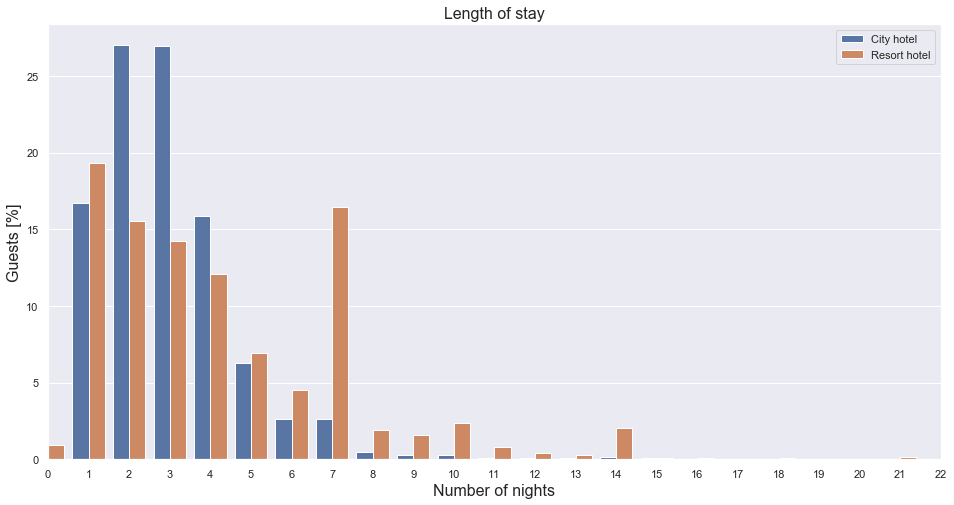

In [10]:
#show figure:
plt.figure(figsize = (16, 8))
sb.barplot(x = 'num_nights', y = 'rel_num_bookings', hue = 'hotel', data = nights_data,
            hue_order = ['City hotel', 'Resort hotel'])
plt.title('Length of stay', fontsize = 16)
plt.xlabel('Number of nights', fontsize = 16)
plt.ylabel('Guests [%]', fontsize = 16)
plt.legend(loc = 'upper right')
plt.xlim(0,22)
plt.show()

### Analysis on distribution type by deposit type

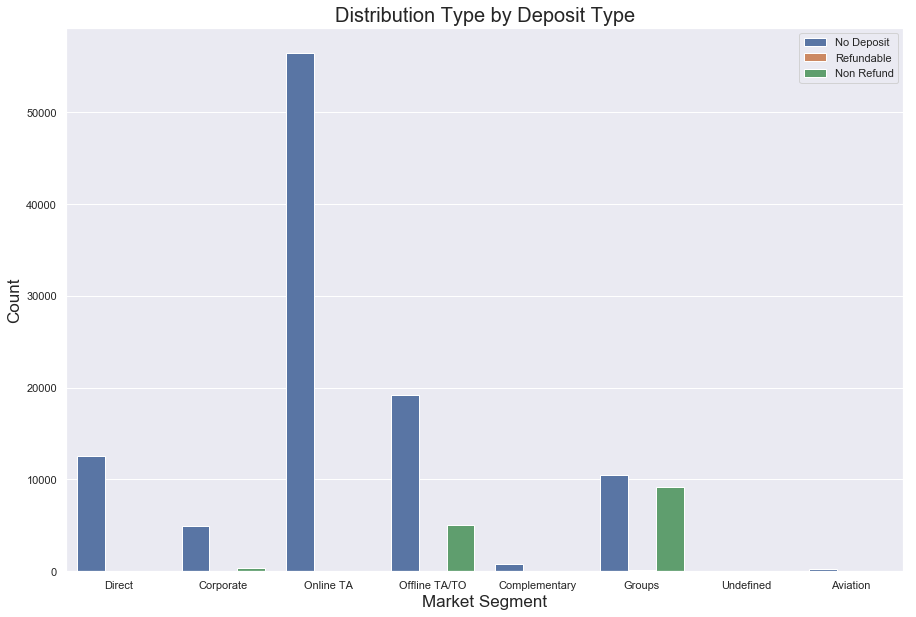

In [11]:
plt.figure(figsize = (15,10))
plt.title('Distribution Type by Deposit Type', fontdict = {'fontsize':20})

ax = sb.countplot(x = 'market_segment', hue = 'deposit_type', data = hotel_data)
ax.set_xlabel('Market Segment', fontsize = 17)
ax.set_ylabel('Count', fontsize = 17)
ax.legend(loc = 'upper right')

### Finding the number of cancelled bookings with respect to each hotel

In [12]:
# Gathering the number of cancellations from the hotel data first
# Then separate them into 2 sets based on which hotel the cancellation is from

total_cancelations = hotel_data['is_canceled'].sum()
resort_hotel_cancelations = hotel_data.loc[hotel_data['hotel'] == 'Resort Hotel']['is_canceled'].sum()
city_hotel_cancelations = hotel_data.loc[hotel_data['hotel'] == 'City Hotel']['is_canceled'].sum()

# Converting the number of cancellations based on hotel into percentages

rel_cancel = total_cancelations / hotel_data.shape[0] * 100
resort_hotel_rel_cancel = resort_hotel_cancelations / hotel_data.loc[hotel_data['hotel'] == 'Resort Hotel'].shape[0] * 100
city_hotel_rel_cancel = city_hotel_cancelations / hotel_data.loc[hotel_data['hotel'] == 'City Hotel'].shape[0] * 100

print(f'Total bookings canceled: {total_cancelations:,} ({rel_cancel:.0f}%)')
print(f'Resort hotel bookings canceled: {resort_hotel_cancelations:,} ({resort_hotel_rel_cancel:.0f}%)')
print(f'City hotel bookings canceled: {city_hotel_cancelations:,} ({city_hotel_rel_cancel:.0f}%)')

Total bookings canceled: 44,224 (37%)
Resort hotel bookings canceled: 11,122 (28%)
City hotel bookings canceled: 33,102 (42%)


### Analysis on distribution type by cancellation

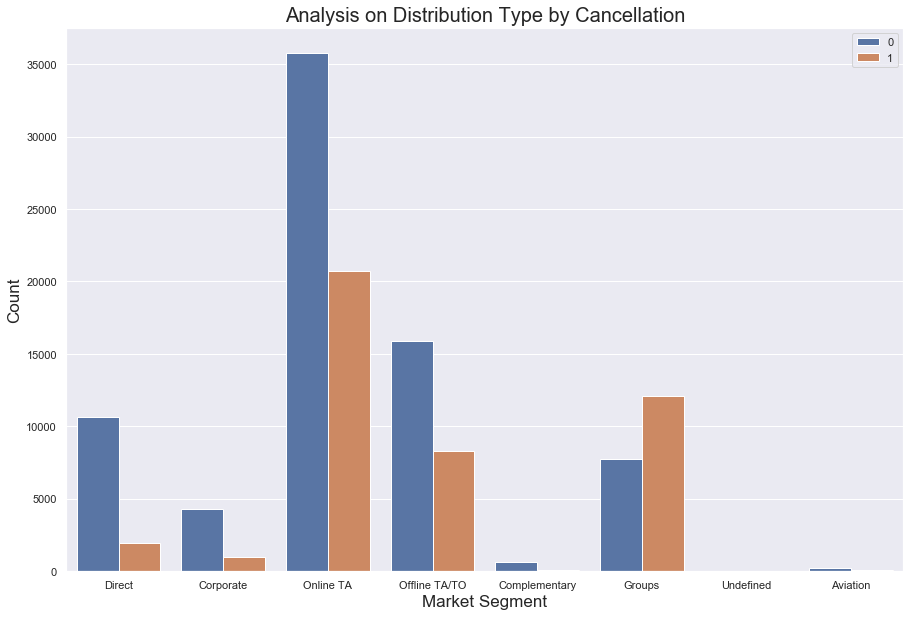

In [13]:
plt.figure(figsize = (15,10))
plt.title('Analysis on Distribution Type by Cancellation', fontdict = {'fontsize':20})

ax = sb.countplot(x = 'market_segment', hue = 'is_canceled', data = hotel_data)
ax.set_xlabel('Market Segment', fontsize = 17)
ax.set_ylabel('Count', fontsize = 17)
ax.legend(loc = 'upper right')

### Record on repeated guests cancelling

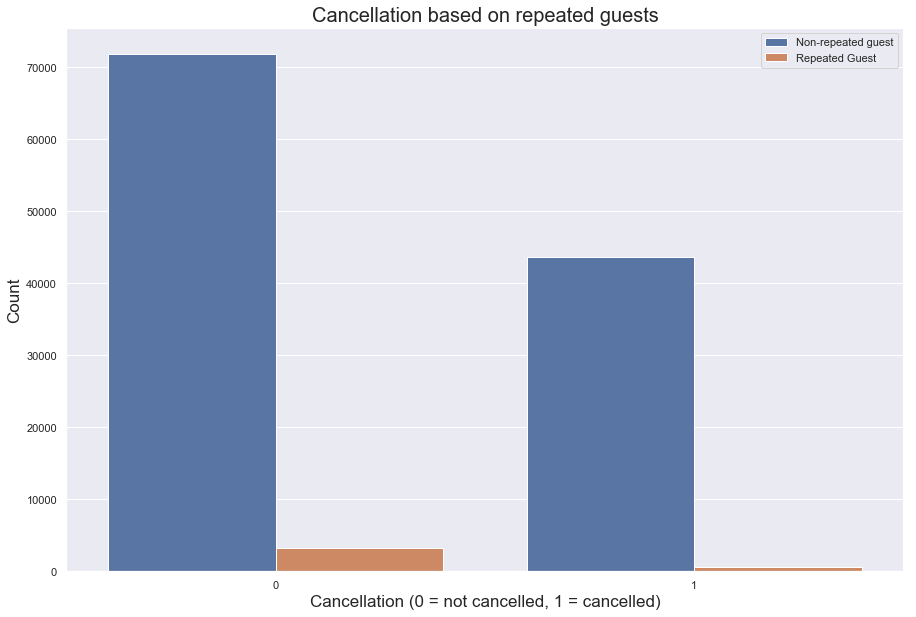

In [14]:
plt.figure(figsize = (15,10))
plt.title('Cancellation based on repeated guests', fontdict = {'fontsize': 20})

ax = sb.countplot(x = 'is_canceled', hue = 'is_repeated_guest', data = hotel_data)
ax.set_xlabel('Cancellation (0 = not cancelled, 1 = cancelled)', fontsize = 17)
ax.set_ylabel('Count', fontsize = 17)
ax.legend(['Non-repeated guest', 'Repeated Guest'], loc = 'upper right')

We can see that majority of the cancellations came from non-repeated guests which suggests that the cancellations come from guests outside the hotels' country.

### Finding the average number of guests for each hotel per month

In [15]:
# Extracting the number of guests based on their arrival month and hotel

resort_guests_monthly = resort_hotel.groupby('arrival_date_month')['hotel'].count()
city_guests_monthly = city_hotel.groupby('arrival_date_month')['hotel'].count()

# Consolidating the extracted data into the respective hotel dataframes 

resort_guest_data = pd.DataFrame({'month': list(resort_guests_monthly.index),
                    'hotel': 'Resort hotel', 
                    'guests': list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({'month': list(city_guests_monthly.index),
                    'hotel': 'City hotel', 
                    'guests': list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index = True)

# Setting the order of months to be shown in the plot or else it will start from April instead

ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October'
                  , 'November', 'December']
full_guest_data['month'] = pd.Categorical(full_guest_data['month'], categories = ordered_months, ordered = True)

In [16]:
resort_guests_monthly

arrival_date_month
April        3609
August       4894
December     2648
February     3103
January      2193
July         4573
June         3045
March        3336
May          3559
November     2437
October      3555
September    3108
Name: hotel, dtype: int64

In [17]:
city_guests_monthly

arrival_date_month
April        7480
August       8983
December     4132
February     4965
January      3736
July         8088
June         7894
March        6458
May          8232
November     4357
October      7605
September    7400
Name: hotel, dtype: int64

As the dataset has number of guests for each month across 3 years, we have to average out the data. 

For example, for the months of July and August, there are 3 years of such months' data in the data. Hence, for those respective months with 3 years of data, it will be averaged out by dividing by 3 while the other months will be averaged out by dividing by 2 instead.

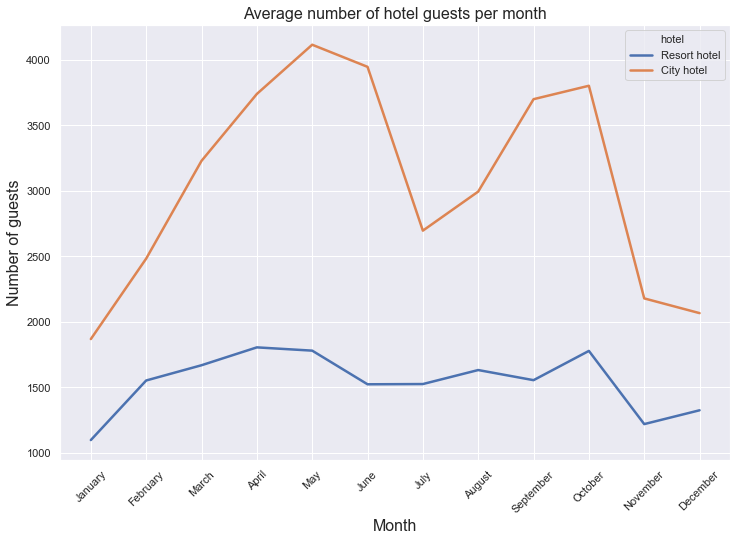

In [18]:
# Averaging out of data with respect to how many years worth of data

full_guest_data.loc[(full_guest_data['month'] == 'July') | (full_guest_data['month'] == 'August'),
                    'guests'] /= 3
full_guest_data.loc[~((full_guest_data['month'] == 'July') | (full_guest_data['month'] == 'August')),
                    'guests'] /= 2

# Preparing the plot 

plt.figure(figsize = (12, 8))
sb.lineplot(x = 'month', y = 'guests', hue = 'hotel', data = full_guest_data, 
             hue_order = ['Resort hotel', 'City hotel'], size = 'hotel', sizes=(2.5, 2.5))
plt.title('Average number of hotel guests per month', fontsize = 16)
plt.xlabel('Month', fontsize = 16)
plt.xticks(rotation = 45)
plt.ylabel('Number of guests', fontsize = 16)
plt.show()

City hotel constantly has more guests but we can also see that there is a sharp decrease in their number of guests in the months of July. This might be attribted to the higher prices (even for City hotel).

## Preprocessing of data

In the next section, I will be conducting feature selection along with feature engineering. Firstly, I will find the number of Nan cells

In [19]:
hotel_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

As shown from the results, the columns with a higher number of missing values includes country, agent and company. We shall then find out about the percentage of Nan compared to the number of rows to evaluate what to do with those rows.

In [20]:
# Calculating the percentage of null values for the respective identified columns

percentage_country = hotel_data['country'].isnull().sum() / len(hotel_data) * 100
percentage_agent = hotel_data['agent'].isnull().sum() / len(hotel_data) * 100
percentage_company = hotel_data['company'].isnull().sum() / len(hotel_data) * 100

print('Percentages of missing values in country column: ', percentage_country)
print('Percentages of missing values in agent column: ', percentage_agent)
print('Percentages of missing values in company column: ', percentage_company)

Percentages of missing values in country column:  0.40874445095904177
Percentages of missing values in agent column:  13.686238378423655
Percentages of missing values in company column:  94.30689337465449


With the percentage of missing values in the country column only at 0.4 percent, we can establish that the best option will be to delete those rows.

However, the same cannot be said for the agent column. However before jumping into any conclusions on what to do, it is usually better to find the feature correlation first. 

Lastly, since approximately 94 percent of the company column is missing and it beng a categorical column (although is is in figures, numbers are constantly repeated which suggests that the number stands for a company but is in figures for the companies to be anonymous). Hence, it will be better to drop the company column.

In [21]:
# We have also 4 missing values in children column. If there is no information about children, In my opinion those customers do not have any children.
hotel_data['children'] = hotel_data['children'].fillna(0)

In [22]:
# Verifying the change in columns
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Next, some columns will be compressed or further categorised to help with finding the correlation.
columns which can be combined include checking if the guests are families, total number of guests and the total number of nights the guests stayed.

In [23]:
# Creating a function to combine the 'adults', 'children' and 'babies' columns into 
# a column that identifies if the guests are a family

def family(data):
    if ((data['adults'] > 0) & (data['children'] > 0)):
        val = 1
    elif ((data['adults'] > 0) & (data['babies'] > 0)):
        val = 1
    else:
        val = 0
    return val

In [24]:
# Creating a function to to add the following columns
# a column that identifies if the guests are a family
# a column that calculates the number of guests
# a column that calculate the duration of their stay

def feature(data):
    hotel_data['is_family'] = hotel_data.apply(family, axis = 1)
    hotel_data['total_customer'] = hotel_data['adults'] + hotel_data['children'] + hotel_data['babies']
    hotel_data['total_nights'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights']
    return data

hotel_data = feature(hotel_data)

Several columns which needs further categorisation includes, hotel, arrival_date_month, meal, distribution_channel, reserved_room_type, assigned_room_type, agent, customer_type, assigned_room_type, agent, customer_type, reservation_status, market_segment, deposit_type. 

As such, the original dataset will also be replicated to prevent confusion and data leakage too

In [25]:
corrlation_data = hotel_data.copy()

For the copied dataset 'correlation_data', label encoding will be used to as the main focus will be to find correlation between features

In [26]:
le = preprocessing.LabelEncoder()

In [27]:
# Label encoding the categorical columns for checking correlation

corrlation_data['meal'] = le.fit_transform(corrlation_data['meal'])
corrlation_data['distribution_channel'] = le.fit_transform(corrlation_data['distribution_channel'])
corrlation_data['reserved_room_type'] = le.fit_transform(corrlation_data['reserved_room_type'])
corrlation_data['assigned_room_type'] = le.fit_transform(corrlation_data['assigned_room_type'])
corrlation_data['agent'] = le.fit_transform(corrlation_data['agent'])
corrlation_data['customer_type'] = le.fit_transform(corrlation_data['customer_type'])
corrlation_data['reservation_status'] = le.fit_transform(corrlation_data['reservation_status'])
corrlation_data['market_segment'] = le.fit_transform(corrlation_data['market_segment'])

corrlation_data.corr()

is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.293123           0.016660   
lead_time                          0.293123   1.000000           0.040142   
arrival_date_year                  0.016660   0.040142           1.000000   
arrival_date_week_number           0.008148   0.126871          -0.540561   
arrival_date_day_of_month         -0.006130   0.002268          -0.000221   
stays_in_weekend_nights           -0.001791   0.085671           0.021497   
stays_in_week_nights               0.024765   0.165799           0.030883   
adults                             0.060017   0.119519           0.029635   
children                           0.005036  -0.037613           0.054636   
babies                            -0.032491  -0.020915          -0.013192   
meal                              -0.017678   0.000349           0.065840   
market_segment                     0.059338   0.013797           0.107697   
distribution_channel               0.167600   0.220414           0.022644   
is_repeated_guest                 -0.084793  -0.124410           0.010341   
previous_cancellations             0.110133   0.086042          -0.119822   
previous_bookings_not_canceled    -0.057358  -0.073548           0.029218   
reserved_room_type                -0.061282  -0.106089           0.092809   
assigned_room_type                -0.176028  -0.172219           0.036141   
booking_changes                   -0.144381   0.000149           0.030872   
agent                             -0.127883  -0.171430          -0.017723   
company                           -0.020642   0.151464           0.259095   
days_in_waiting_list               0.054186   0.170084          -0.056497   
customer_type                     -0.068140   0.073403          -0.006149   
adr                                0.047557  -0.063077           0.197580   
required_car_parking_spaces       -0.195498  -0.116451          -0.013684   
total_of_special_requests         -0.234658  -0.095712           0.108531   
reservation_status                -0.917196  -0.302175          -0.017683   
is_family                         -0.013010  -0.043972           0.052711   
total_customer                     0.046522   0.072265           0.052127   
total_nights                       0.017779   0.157167           0.031438   

                                arrival_date_week_number  \
is_canceled                                     0.008148   
lead_time                                       0.126871   
arrival_date_year                              -0.540561   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.066809   
stays_in_weekend_nights                         0.018208   
stays_in_week_nights                            0.015558   
adults                                          0.025909   
children                                        0.005515   
babies                                          0.010395   
meal                                           -0.017381   
market_segment                                 -0.000510   
distribution_channel                            0.005699   
is_repeated_guest                              -0.030131   
previous_cancellations                          0.035501   
previous_bookings_not_canceled                 -0.020904   
reserved_room_type                             -0.007997   
assigned_room_type                             -0.005684   
booking_changes                                 0.005508   
agent                                           0.001638   
company                                        -0.076760   
days_in_waiting_list                            0.022933   
customer_type                                  -0.028432   
adr                                             0.075791   
required_car_parking_spaces                     0.001920   
total_of_special_requests                       0.026149   
reservation_status      

As there are many features to compare, a heatmap might come in useful in this situation

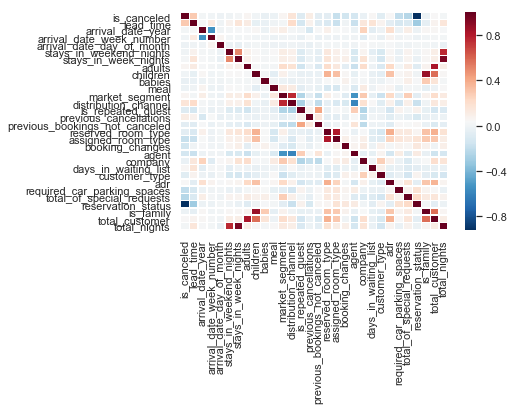

In [28]:
sb.heatmap(corrlation_data.corr(),
            xticklabels = corrlation_data.corr().columns,
            yticklabels = corrlation_data.corr().columns,
            cmap = 'RdBu_r',
            annot = False,
            linewidth = 0.5)

plt.show()

A direct comparison of every column with the label column can be used for easier comparison

In [29]:
corrlation_data.corr()['is_canceled'].sort_values()

reservation_status               -0.917196
total_of_special_requests        -0.234658
required_car_parking_spaces      -0.195498
assigned_room_type               -0.176028
booking_changes                  -0.144381
agent                            -0.127883
is_repeated_guest                -0.084793
customer_type                    -0.068140
reserved_room_type               -0.061282
previous_bookings_not_canceled   -0.057358
babies                           -0.032491
company                          -0.020642
meal                             -0.017678
is_family                        -0.013010
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
children                          0.005036
arrival_date_week_number          0.008148
arrival_date_year                 0.016660
total_nights                      0.017779
stays_in_week_nights              0.024765
total_customer                    0.046522
adr                               0.047557
days_in_wai

The column, reservation status, seems to be the most impactful feature as it has the highest correlation with the cancellation column. However, it is not always the best idea to include such a column and as such, I will be trying out both datasets, one with the reservation status and one without.

As I will be testing a few datasets, I will also drop a few other columns which has very little correlation. I decided to benchmark and set the lowest correlation value to be at 0.015

Thus, the columns that do not fulfil my criteria will include, arrival_date_day_of_month, stays_in_weekend_nights, children, arrival_date_week_number, adults reservation_status_date.

The column which evaluates if the guests is a family or not will be an exception as I created it and has better correlation than all the inital columns as well.

Also, still we have some missing values in agent column. It has nice importance on predicting cancellation but since the missing values are equal to 13% of the total data it is better to drop that column. It has a lot of class inside of it otherwise we could try predicting missing values but they may misguide the predictions.

# Preparing the actual dataset

Multiple datasets will be prepared to evaluate the effectiveness of each. 

The first dataset will only have the Nan cells and rows corrected accordingly.
The second dataset will have several features deleted as found from the work above.
The third will be in a separate document with PCA involved to evaluate if it helps and to compare the relationship between the time it takes and the accuracy.

In [30]:
# Creating a copy of the original dataset to prevent confusion

final_data1 = hotel_data.copy()
final_data2 = hotel_data.copy()

In [31]:
# Remove the null values in the country columns

indices = hotel_data.loc[pd.isna(hotel_data['country']), :].index 
final_data1 = final_data1.drop(final_data1.index[indices]) 
final_data2 = final_data2.drop(final_data2.index[indices])  

The country column will still be using label encoding as there are more than 300 variables, hence, I believe adding an addtional 300 columns will not be practical in this situation. 

The remaining categorical columns will be converted using one-hot encoding instead.

In [32]:
final_data1['country'] = le.fit_transform(final_data1['country']) 
final_data2['country'] = le.fit_transform(final_data2['country']) 

#one-hot-encoding
final_data1 = pd.get_dummies(data = final_data1, columns = ['hotel', 'arrival_date_month', 'meal', 'market_segment'
                                                            , 'distribution_channel', 'reserved_room_type', 'deposit_type'
                                                            , 'assigned_room_type', 'customer_type', 'reservation_status'])
final_data2 = pd.get_dummies(data = final_data2, columns = ['hotel','meal', 'market_segment'
                                                            , 'distribution_channel', 'reserved_room_type', 'deposit_type'
                                                            , 'assigned_room_type', 'customer_type', 'reservation_status'])

In [33]:
# Dropping the found columns from the second dataset

final_data2 = final_data2.drop(columns = [ 'reservation_status_Canceled', 'reservation_status_Check-Out'
                                          , 'reservation_status_No-Show', 'arrival_date_day_of_month'
                                          , 'stays_in_weekend_nights', 'children', 'arrival_date_week_number'
                                          , 'arrival_date_week_number', 'arrival_date_month', 'agent'
                                          , 'reservation_status_date'], axis = 1)

In [34]:
label = final_data1['is_canceled']


final_data1 = final_data1.drop(['is_canceled', 'company', 'agent', 'reservation_status_date'], axis =1)
final_data2 = final_data2.drop(['is_canceled', 'company'], axis =1)

In [35]:
final_data1.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'country',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_family', 'total_customer',
       'total_nights', 'hotel_City Hotel', 'hotel_Resort Hotel',
       'arrival_date_month_April', 'arrival_date_month_August',
       'arrival_date_month_December', 'arrival_date_month_February',
       'arrival_date_month_January', 'arrival_date_month_July',
       'arrival_date_month_June', 'arrival_date_month_March',
       'arrival_date_month_May', 'arrival_date_month_November',
       'arrival_date_month_October', 'arrival_date_month_September', 'meal_BB',
       'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'market_seg

In [36]:
# To reshape the label column into one that can be used for testing later

label.values.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [37]:
final_data1.isna().sum()

lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
country                           0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customer                    0
total_nights                      0
hotel_City Hotel                  0
hotel_Resort Hotel                0
arrival_date_month_April          0
arrival_date_month_August         0
arrival_date_month_December       0
arrival_date_month_February       0
arrival_date_month_January  

## Trying Algorithms

In this section, we will be deciding on whether to use the reservation-status column as it has a very high correlation with the cancellation column.

Then, I will be trying several algorithms to pick one which is the most suitable using train test split and CV. From there, I will then tune the best model to hopefully get a even better accuracy.

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [39]:
x_train, x_test, y_train, y_test = train_test_split(final_data1, label, test_size = 0.30, random_state = 42)

In [40]:
RF = RandomForestClassifier()
tryout = RF.fit(x_train, y_train)
y_pred = tryout.predict(x_test)

In [41]:
print('Random Forest Model')

print('Accuracy Score: ', accuracy_score(y_test,y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test,y_pred))
print('AUC Score: ', roc_auc_score(y_test,y_pred))      

Random Forest Model
Accuracy Score:  1.0
Confusion Matrix:  [[22353     0]
 [    0 13318]]
AUC Score:  1.0


Text(0.5,0,'Feature Importances (%)')

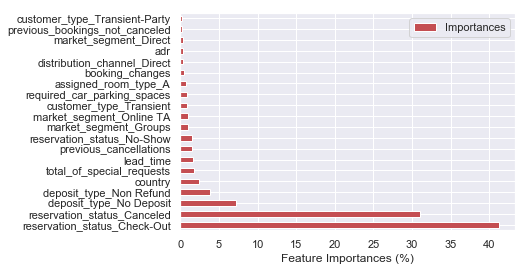

In [42]:
pd.DataFrame(data = tryout.feature_importances_*100,
                   columns = ['Importances'],
                   index = x_train.columns).sort_values('Importances', ascending = False)[:20].plot(kind = 'barh', color = 'r')

plt.xlabel('Feature Importances (%)')

As the results show, it is pure 100% accuracy from using the random forest classifier. Hence it will not make too much sense to have a feature which has a correlation as strong as reservation_status anymore. We shall then only do algorithm testing using the second dataset instead.

In [43]:
x_train, x_test, y_train, y_test = train_test_split(final_data2, label, test_size = 0.30, random_state = 42)

I shall also create functions which will help to apply the different algorithms later more easily.

In [44]:
def algotesting(algo, x_train, x_test, y_train, y_test):
    algo_model = algo.fit(x_train, y_train)
    global y_prob, y_pred
    y_prob = algo.predict_proba(x_test)[:,1]
    y_pred = algo_model.predict(x_test)
    
    print(algo)

    print('\nAccuracy Score: ', accuracy_score(y_test,y_pred))
    print('Confusion Matrix: ', confusion_matrix(y_test,y_pred))
    print('AUC Score: ', roc_auc_score(y_test,y_pred))    
    

def ROC(y_test, y_prob):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (15,15))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'orange', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

### Logistic Regression

In [45]:
print('Model: Logistic Regression\n')

algotesting(LogisticRegression(solver = 'liblinear'), x_train, x_test, y_train, y_test)

Model: Logistic Regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Accuracy Score:  0.8029491743993721
Confusion Matrix:  [[20527  1826]
 [ 5203  8115]]
AUC Score:  0.7638182329353969


In [46]:
LogR = LogisticRegression(solver = 'liblinear')
cv_scores = cross_val_score(LogR, final_data2, label, cv = 10, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.7757408344483858


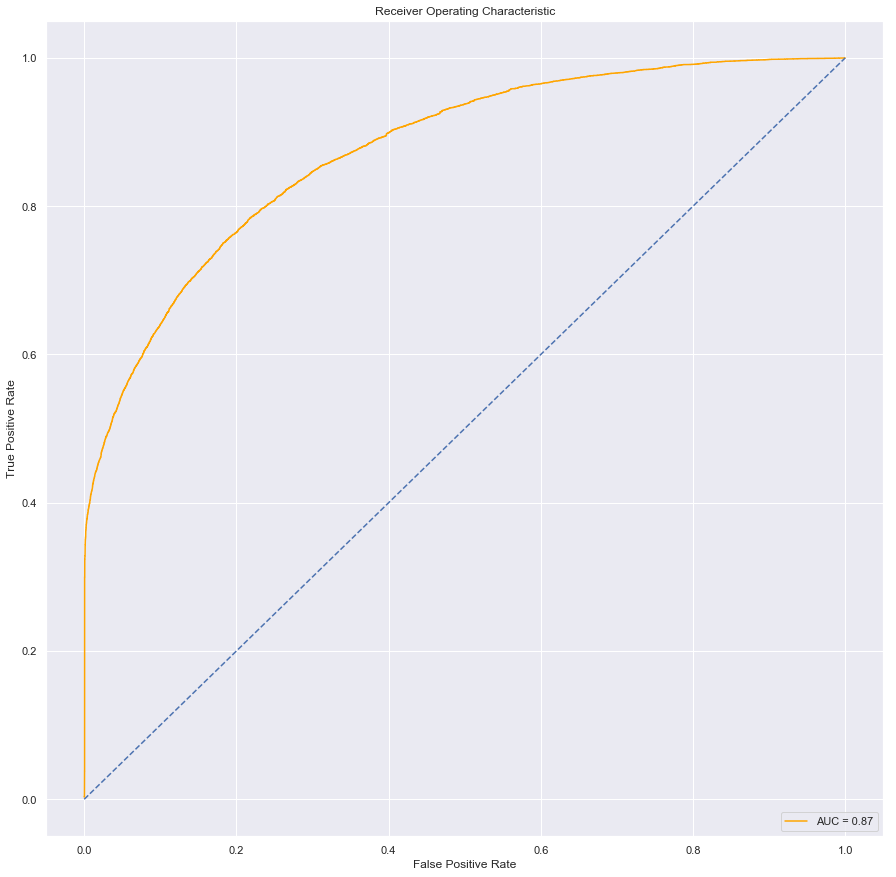

In [47]:
ROC(y_test, y_prob)

### KNN

For KNN, there is also the decision to make on how many neighbours to use. Therefore, we shall create a loop to decide which number of neighbours (1 to 20) will give us the best accuracy score.

In [48]:
total = 0
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K, algorithm = 'auto')

    model.fit(x_train, y_train)                 # fit the model
    pred = model.predict(x_test)                  # make prediction on test set
    error = accuracy_score(y_test,pred)         #calculate rmse
    total = total + error
    print('Accuracy value for k = ' , K , 'is:', error)

avg = total / K
print('Average accuracy value for k =', avg)

Accuracy value for k =  1 is: 0.7889321858092008
Accuracy value for k =  2 is: 0.8021081550839617
Accuracy value for k =  3 is: 0.7889041518320205
Accuracy value for k =  4 is: 0.79787502452973
Accuracy value for k =  5 is: 0.7900815788735948
Accuracy value for k =  6 is: 0.7944829132909086
Accuracy value for k =  7 is: 0.7868576714978553
Accuracy value for k =  8 is: 0.7938100978385804
Accuracy value for k =  9 is: 0.7866333996804127
Accuracy value for k =  10 is: 0.7887639819461187
Accuracy value for k =  11 is: 0.7852317008213955
Accuracy value for k =  12 is: 0.7878668946763477
Accuracy value for k =  13 is: 0.7846429873006083
Accuracy value for k =  14 is: 0.7849793950267725
Accuracy value for k =  15 is: 0.7834655602590339
Accuracy value for k =  16 is: 0.7836617980992964
Accuracy value for k =  17 is: 0.7819517254912954
Accuracy value for k =  18 is: 0.7821759973087382
Accuracy value for k =  19 is: 0.778727818115556
Accuracy value for k =  20 is: 0.7795968714081467
Average accu

It seems that having 2 neighbours give the best result, hence we will be implementing k = 2

In [49]:
print('Model: K-Nearest Neighbour\n')

algotesting(neighbors.KNeighborsClassifier(n_neighbors = 2), x_train, x_test, y_train, y_test)

Model: K-Nearest Neighbour

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

Accuracy Score:  0.8021081550839617
Confusion Matrix:  [[20654  1699]
 [ 5360  7958]]
AUC Score:  0.7607647365131558


In [50]:
KNN = neighbors.KNeighborsClassifier(n_neighbors = 2)
cv_scores = cross_val_score(KNN, final_data2, label, cv = 10, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.6541274475284231


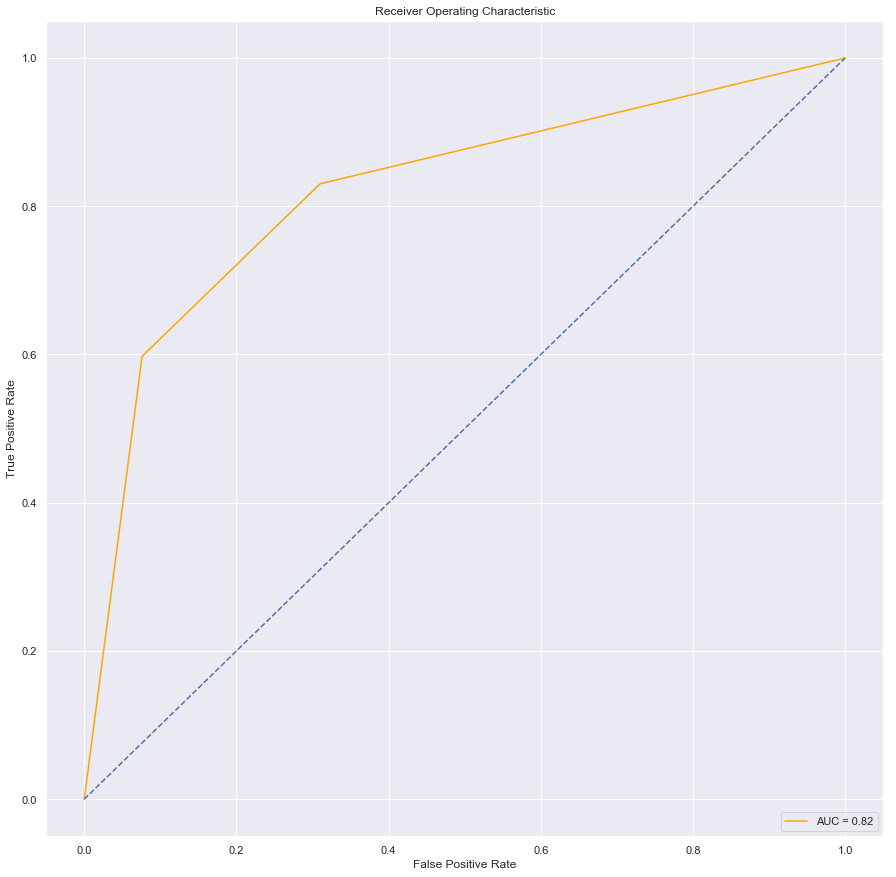

In [51]:
ROC(y_test, y_prob)

### Support Vector Classifier (SVC)

In [52]:
print('Model: Support Vector Classifier (Linear)\n')

def algotesting1(algorithm, X_train, X_test, y_train, y_test):
    algo_model = algorithm.fit(X_train, y_train)
    global y_pred
    y_pred = algo_model.predict(X_test)
    print(algorithm)

    print('\nAccuracy Score: ', accuracy_score(y_test,y_pred))
    print('Confusion Matrix: ', confusion_matrix(y_test,y_pred))
    print('AUC Score: ', roc_auc_score(y_test,y_pred))  

algotesting1(LinearSVC(), x_train, x_test, y_train, y_test)

Model: Support Vector Classifier (Linear)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Accuracy Score:  0.3946342967676824
Confusion Matrix:  [[  786 21567]
 [   27 13291]]
AUC Score:  0.5165678669646042


In [53]:
SVC = LinearSVC()
cv_scores = cross_val_score(SVC, final_data2, label, cv = 10, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.7088926609660624


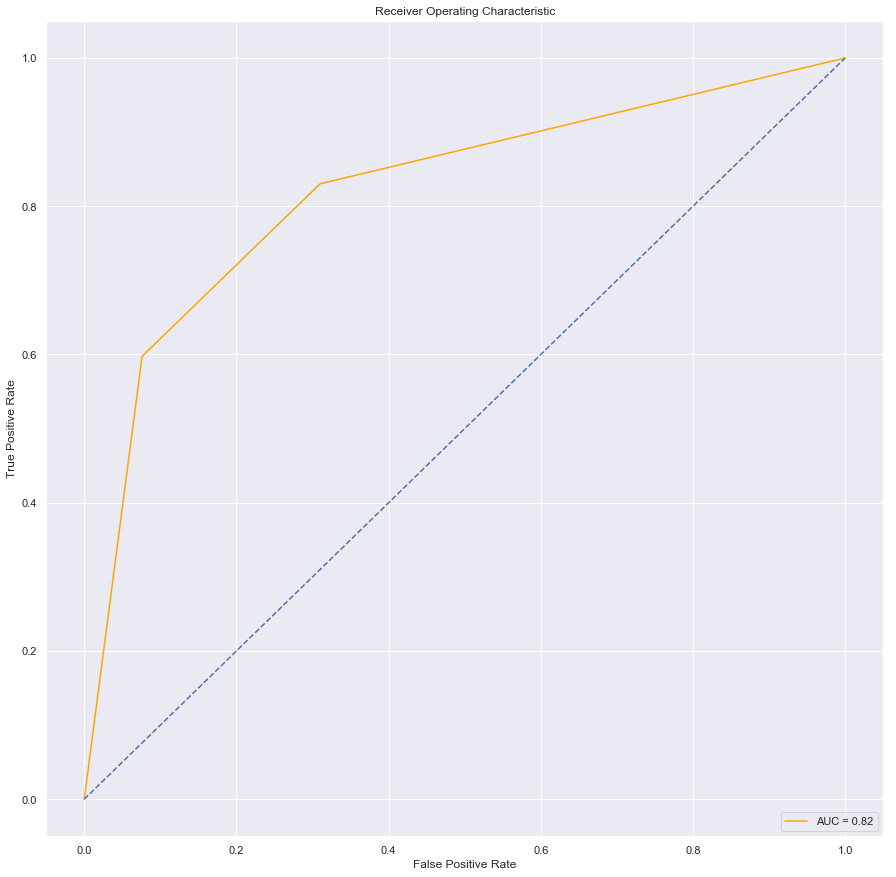

In [54]:
ROC(y_test, y_prob)

### Naive Bayes

In [55]:
print('Model: Gaussian Naive Bayes\n')

algotesting(GaussianNB(), x_train, x_test, y_train, y_test)

Model: Gaussian Naive Bayes

GaussianNB(priors=None)

Accuracy Score:  0.6002915533626756
Confusion Matrix:  [[10379 11974]
 [ 2284 11034]]
AUC Score:  0.646412620252117


In [56]:
GNb = GaussianNB()
cv_scores = cross_val_score(GNb, final_data2, label, cv = 10, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.5885219125713933


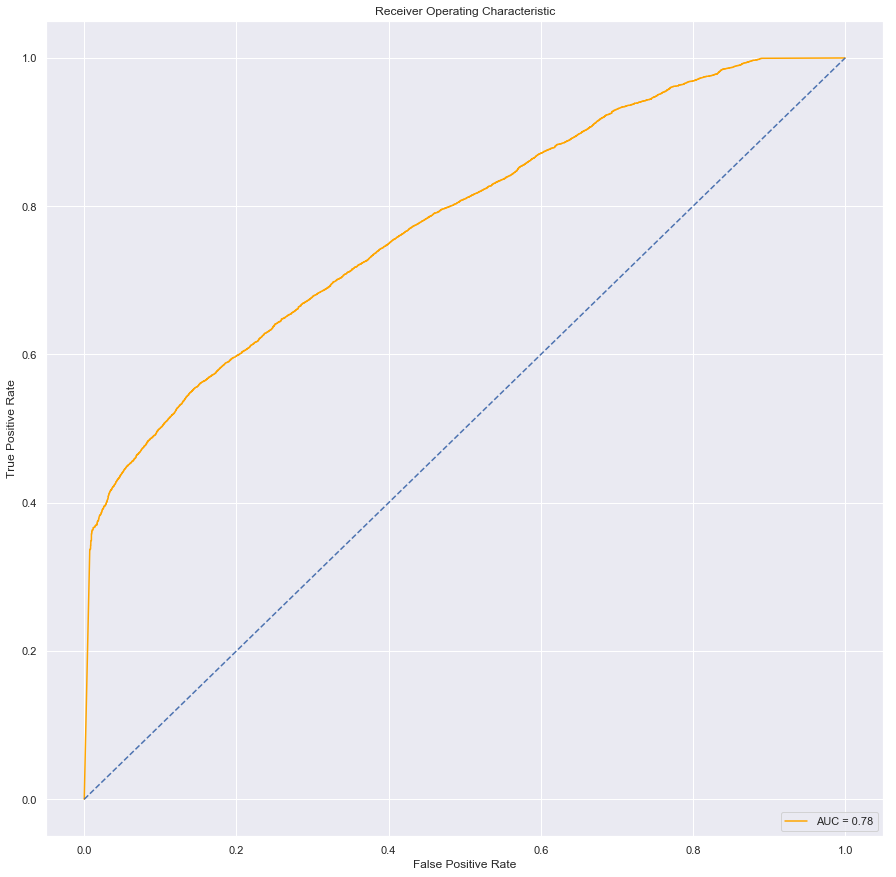

In [57]:
ROC(y_test, y_prob)

### Decision Tree

In [58]:
print('Model: Decision Tree\n')

algotesting(DecisionTreeClassifier(), x_train, x_test, y_train, y_test)

Model: Decision Tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Accuracy Score:  0.8434022034706063
Confusion Matrix:  [[19498  2855]
 [ 2731 10587]]
AUC Score:  0.8336079159803066


In [59]:
DT = DecisionTreeClassifier()
cv_scores = cross_val_score(DT, final_data2, label, cv = 10, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.6717716256082091


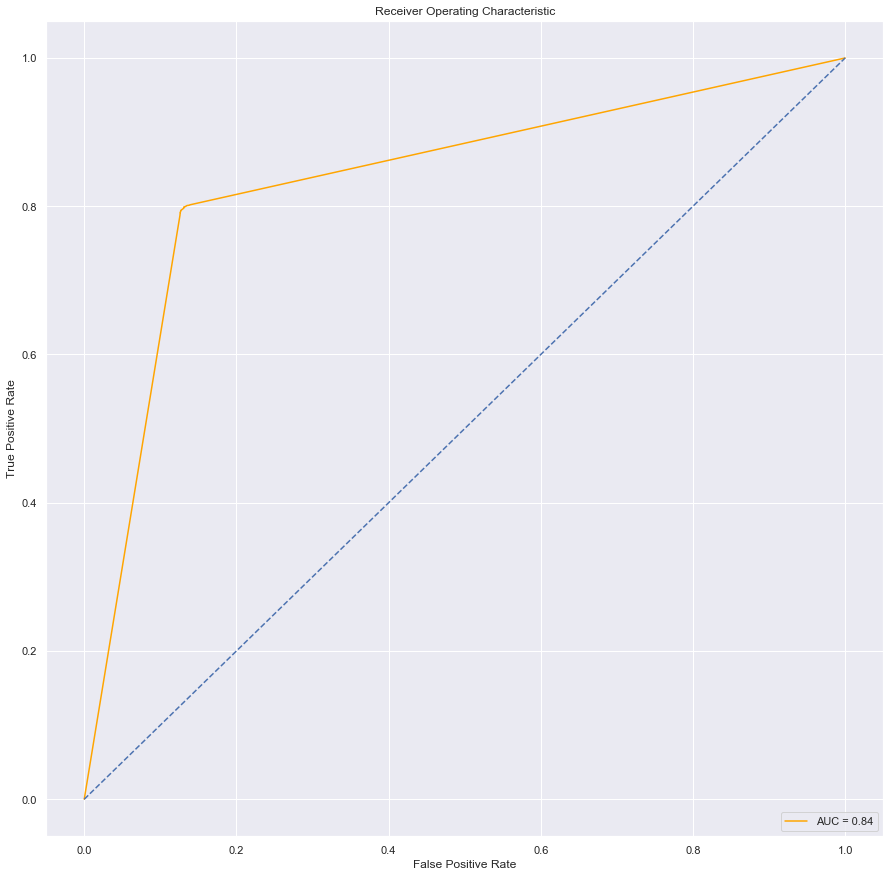

In [60]:
ROC(y_test, y_prob)

### Random Forest

In [61]:
print('Model:Random Forest\n')

algotesting(RandomForestClassifier(), x_train, x_test, y_train, y_test)

Model:Random Forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Accuracy Score:  0.8719688262173755
Confusion Matrix:  [[20878  1475]
 [ 3092 10226]]
AUC Score:  0.8509231697515086


In [62]:
RFC = RandomForestClassifier()
cv_scores = cross_val_score(RFC, final_data2, label, cv = 10, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.7151265006760759


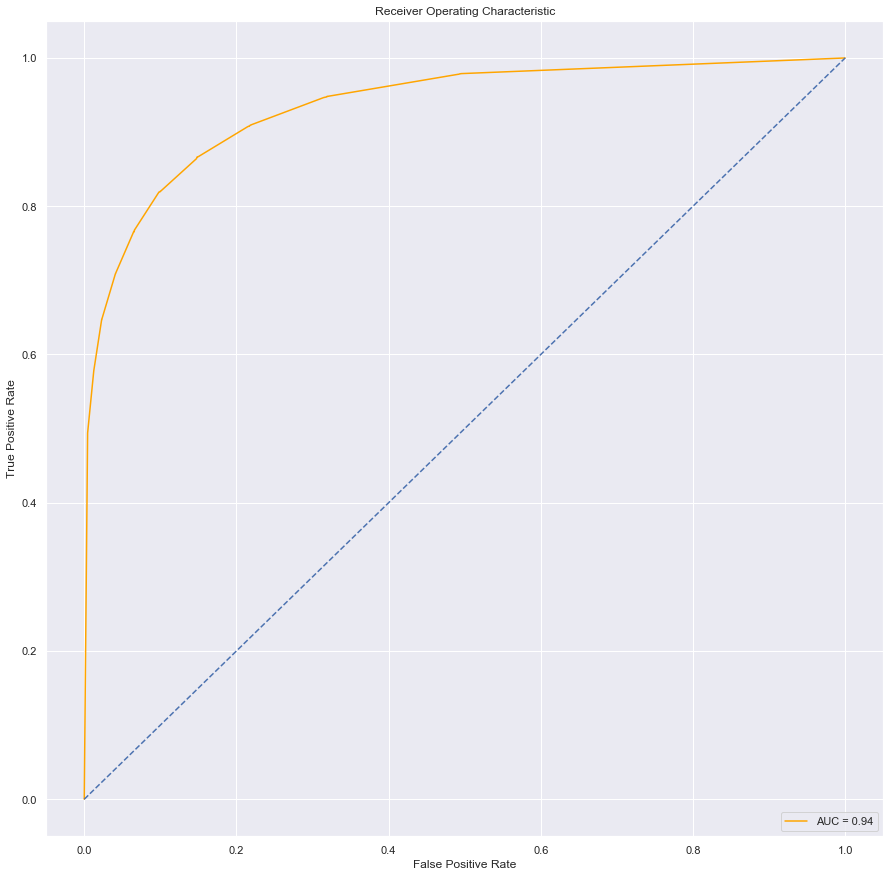

In [63]:
ROC(y_test, y_prob)

### XGBoost

In [64]:
print('Model: XGBoost\n')

algotesting(XGBClassifier(), x_train, x_test, y_train, y_test)

Model: XGBoost

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

Accuracy Score:  0.8685206470241933
Confusion Matrix:  [[20545  1808]
 [ 2882 10436]]
AUC Score:  0.8513585718194094


In [65]:
XGB = XGBClassifier()
cv_scores = cross_val_score(XGB, final_data2, label, cv = 10, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.7263886783492832


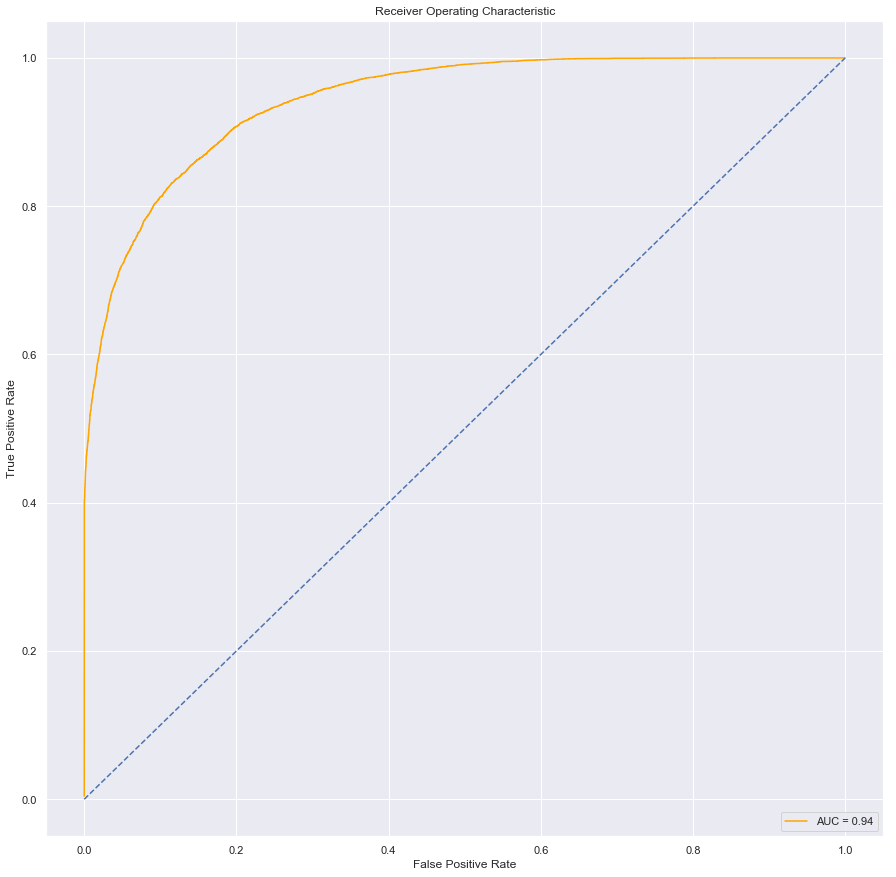

In [66]:
ROC(y_test, y_prob)

### Neural Network

In [67]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [68]:
print('Model: Neural Network\n')

algotesting(MLPClassifier(), x_train, x_test, y_train, y_test)

Model: Neural Network

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Accuracy Score:  0.8167418911721006
Confusion Matrix:  [[19310  3043]
 [ 3494  9824]]
AUC Score:  0.8007572216302674


In [69]:
NN = MLPClassifier()
cv_scores = cross_val_score(NN, final_data2, label, cv = 10, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.7363384853526189


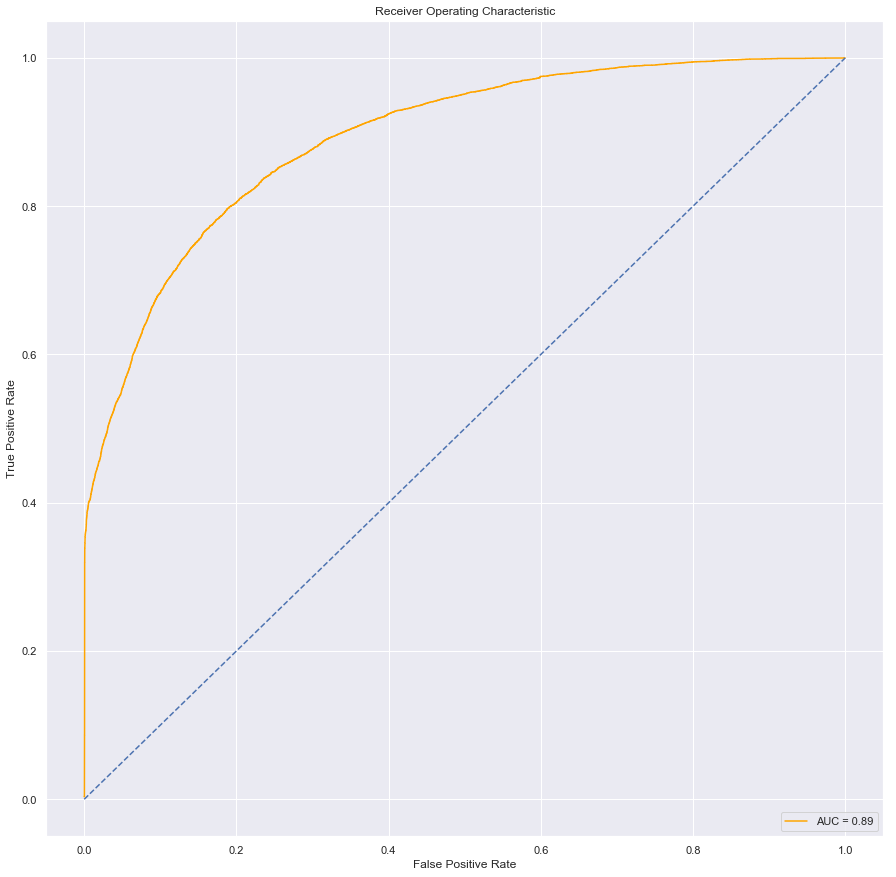

In [70]:
ROC(y_test, y_prob)

In [71]:
table = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Classifier (Linear)'
                                , 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network']
                                , 'Accuracy Scores': ['0.802', '0.802', '0.793', '0.600', '0.844', '0.870'
                                                      , '0.867', '0.813']
                                , 'Mean Score (CV = 10)': ['0.778', '0.654', '0.654', '0.588', '0.671', '0.706', '0.723', '0.734']
                                , 'ROC | Auc': ['0.87', '0.82', '0.87', '0.78', '0.84', '0.93', '0.94', '0.9']})


table['Model'] = table['Model'].astype('category')
table['Accuracy Scores'] = table['Accuracy Scores'].astype('float32')
table['Mean Score (CV = 10)'] = table['Mean Score (CV = 10)'].astype('float32')                              
table['ROC | Auc'] = table['ROC | Auc'].astype('float32')

pd.pivot_table(table, index = ['Model']).sort_values(by = 'Accuracy Scores', ascending=False)

Accuracy Scores  Mean Score (CV = 10)  \
Model                                                                       
Random Forest                                 0.870                 0.706   
XGBoost                                       0.867                 0.723   
Decision Tree                                 0.844                 0.671   
Neural Network                                0.813                 0.734   
K-Nearest Neighbour                           0.802                 0.654   
Logistic Regression                           0.802                 0.778   
Support Vector Classifier (Linear)            0.793                 0.654   
Naive Bayes                                   0.600                 0.588   

                                    ROC | Auc  
Model                                          
Random Forest                            0.93  
XGBoost                                  0.94  
Decision Tree                            0.84  
Neural Network                           0.90  
K-Nearest Neighbour                      0.82  
Logistic Regression                      0.87  
Support Vector Classifier (Linear)       0.87  
Naive Bayes                              0.78

## Conclusion

Hence from the table above, comparing all the algorithms tested, random forest and XGBoost seems to be the most promising algorithms which can create good models with higher accuracy, especially XGBoost.

## Future Work

The next objective will be tuning the models with greater potential. As I am also doing several other projects, I have decided to tune the models separately from this project and when finished, will be placed into the same Github folder as well.

Thank you very much for reading through my analysis

If you have any feedback or suggestions for me to improve, I sincerely welcome them! 

You may reach out to me at atan091@e.ntu.edu.sg